# Лабораторная работа 5.2

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

%matplotlib inline

In [114]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Задание 1

In [115]:
X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Исследование качества модели от глубины деревьев

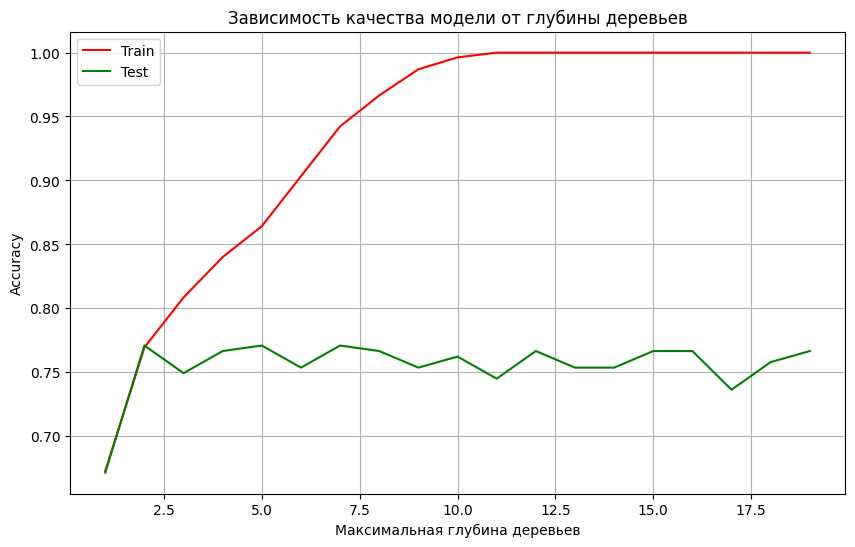

In [117]:
max_depth_range = np.arange(1, 20)
train_scores = []
test_scores = []

for max_depth in max_depth_range:
    rf = RandomForestClassifier(max_depth=max_depth)
    rf.fit(X_train, y_train)
    
    train_scores.append(accuracy_score(y_train, rf.predict(X_train)))
    test_scores.append(accuracy_score(y_test, rf.predict(X_test)))


plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_scores, label="Train", color='r')
plt.plot(max_depth_range, test_scores, label="Test", color='g')
plt.xlabel("Максимальная глубина деревьев")
plt.ylabel("Accuracy")
plt.title("Зависимость качества модели от глубины деревьев")
plt.legend()
plt.grid(True)
plt.show()

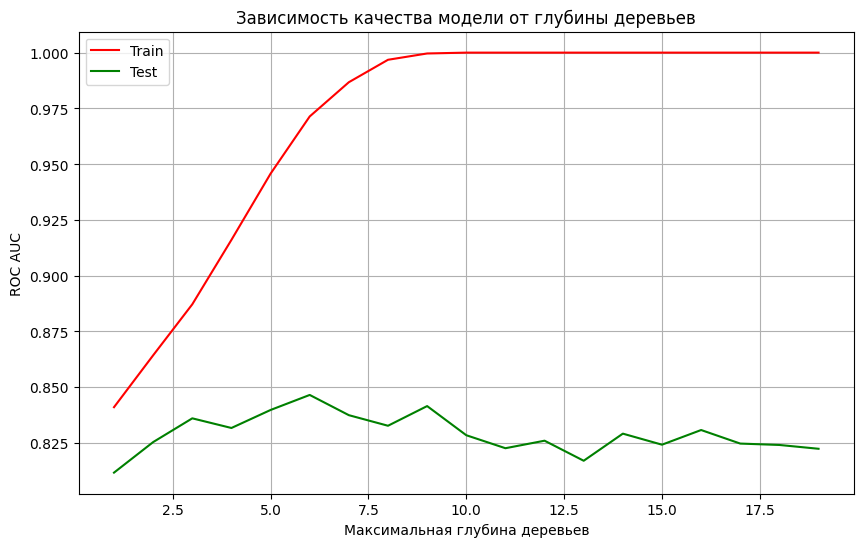

In [118]:
train_scores = []
test_scores = []

for max_depth in max_depth_range:
    rf = RandomForestClassifier(max_depth=max_depth)
    rf.fit(X_train, y_train)
    
    train_scores.append(roc_auc_score(y_train, rf.predict_proba(X_train)[:,1]))
    test_scores.append(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_scores, label="Train", color='r')
plt.plot(max_depth_range, test_scores, label="Test", color='g')
plt.xlabel("Максимальная глубина деревьев")
plt.ylabel("ROC AUC")
plt.title("Зависимость качества модели от глубины деревьев")
plt.legend()
plt.grid(True)
plt.show()

### Исследование качества модели от количества признаков, подаваемых на дерево

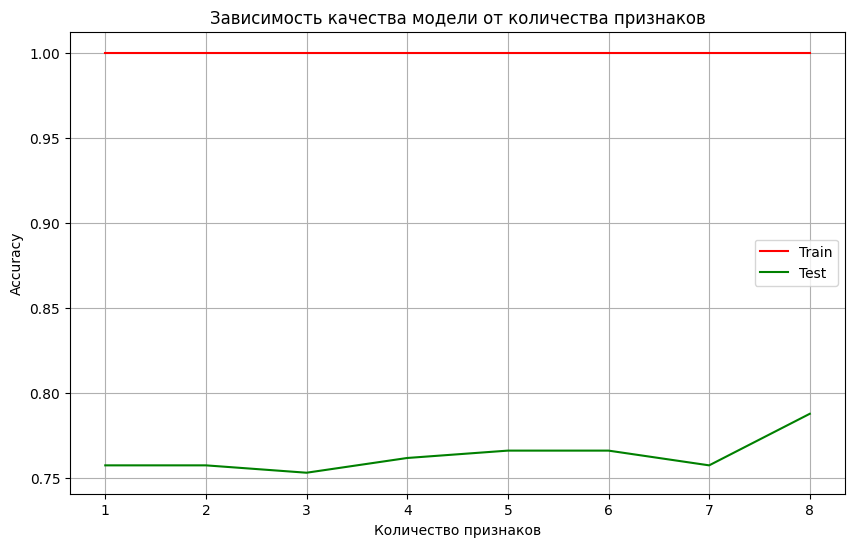

In [119]:
max_features_range = np.arange(1, X_train.shape[1] + 1)
train_scores = []
test_scores = []

for max_features in max_features_range:
    rf = RandomForestClassifier(max_features=max_features)
    rf.fit(X_train, y_train)
    
    train_scores.append(accuracy_score(y_train, rf.predict(X_train)))
    test_scores.append(accuracy_score(y_test, rf.predict(X_test)))



plt.figure(figsize=(10, 6))
plt.plot(max_features_range, train_scores, label="Train", color='r')
plt.plot(max_features_range, test_scores, label="Test", color='g')
plt.xlabel("Количество признаков")
plt.ylabel("Accuracy")
plt.title("Зависимость качества модели от количества признаков")
plt.legend()
plt.grid(True)
plt.show()


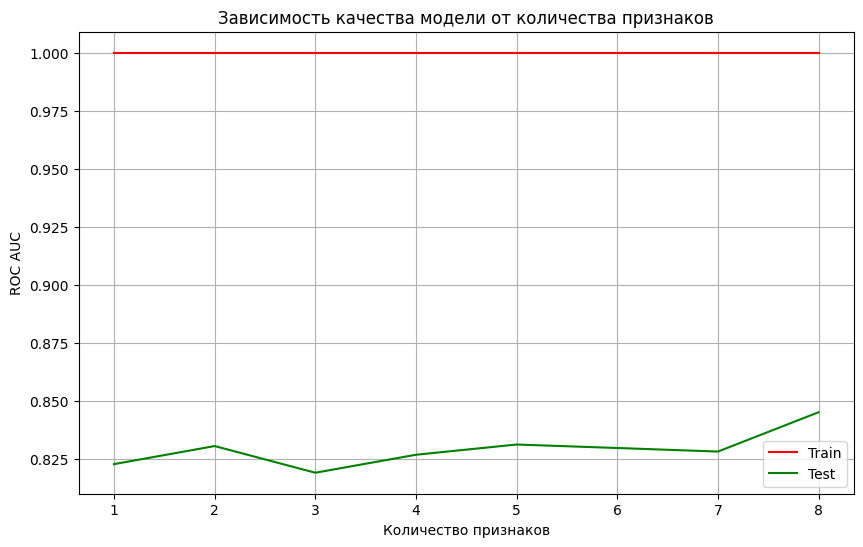

In [120]:
train_scores = []
test_scores = []

for max_features in max_features_range:
    rf = RandomForestClassifier(max_features=max_features)
    rf.fit(X_train, y_train)
    
    train_scores.append(roc_auc_score(y_train, rf.predict_proba(X_train)[:,1]))
    test_scores.append(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))



plt.figure(figsize=(10, 6))
plt.plot(max_features_range, train_scores, label="Train", color='r')
plt.plot(max_features_range, test_scores, label="Test", color='g')
plt.xlabel("Количество признаков")
plt.ylabel("ROC AUC")
plt.title("Зависимость качества модели от количества признаков")
plt.legend()
plt.grid(True)
plt.show()


### Исследование качества модели от числа деревьев и времени обучения

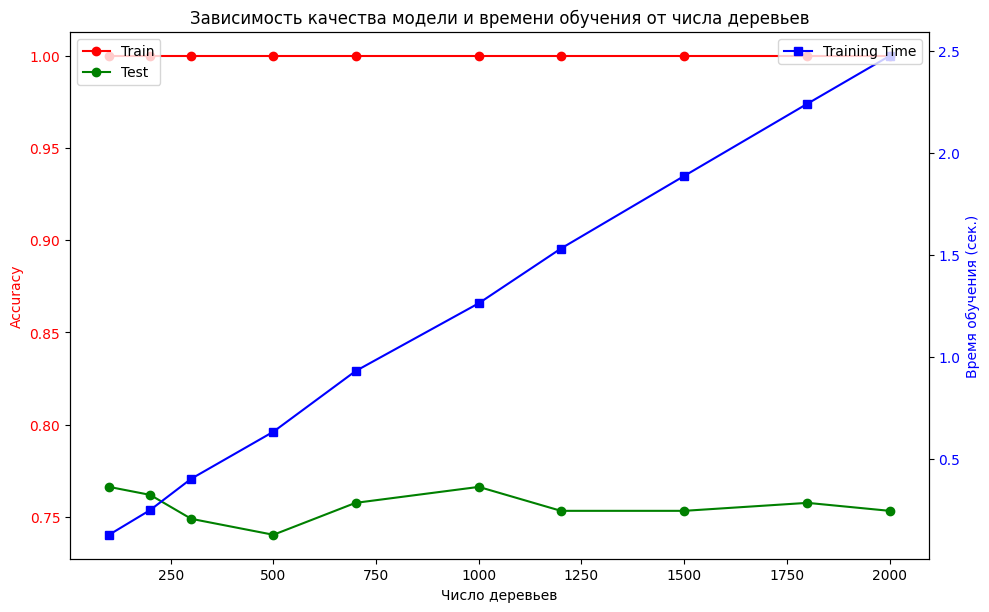

In [121]:
n_estimators_range = [100, 200, 300, 500, 700, 1000, 1200, 1500, 1800, 2000]
train_scores = []
test_scores = []
training_times = []

for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators)
    
    start_time = time.time()
    rf.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    train_scores.append(accuracy_score(y_train, rf.predict(X_train)))
    test_scores.append(accuracy_score(y_test, rf.predict(X_test)))
    training_times.append(training_time)





fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Число деревьев')
ax1.set_ylabel('Accuracy', color='r')
ax1.plot(n_estimators_range, train_scores, label="Train", color='r', marker='o')
ax1.plot(n_estimators_range, test_scores, label="Test", color='g', marker='o')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()  # Создаем второй y-ax
ax2.set_ylabel('Время обучения (сек.)', color='b')
ax2.plot(n_estimators_range, training_times, label="Training Time", color='b', marker='s')
ax2.tick_params(axis='y', labelcolor='b')

fig.tight_layout()  # Для красивого расположения графиков
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title("Зависимость качества модели и времени обучения от числа деревьев")
plt.show()


## XGBoost

In [122]:
start = time.time()

xgb = XGBClassifier(eval_metric='logloss', max_depth=4, learning_rate=0.01, n_estimators=200)
xgb.fit(X_train, y_train)

end = time.time()

In [123]:
y_pred = xgb.predict(X_test)
print("Время обучения:", round(end - start, 3), "секунд")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred))


Время обучения: 0.058 секунд
Accuracy: 0.7402597402597403
ROC AUC: 0.8366089273817455
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       152
           1       0.64      0.56      0.59        79

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.74       231



Исследование learning_rate

In [135]:
for lr in [0.001, 0.01, 0.05, 0.07, 0.1, 0.2, 0.3]:
    xgb = XGBClassifier(eval_metric='logloss', max_depth=4, learning_rate=lr, n_estimators=100)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    print(f"LR: {lr}, Accuracy: {accuracy_score(y_test, y_pred):.4f}, ROC AUC: {roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]):.4f}")

LR: 0.001, Accuracy: 0.6580, ROC AUC: 0.8317
LR: 0.01, Accuracy: 0.7532, ROC AUC: 0.8414
LR: 0.05, Accuracy: 0.7489, ROC AUC: 0.8279
LR: 0.07, Accuracy: 0.7532, ROC AUC: 0.8230
LR: 0.1, Accuracy: 0.7359, ROC AUC: 0.8089
LR: 0.2, Accuracy: 0.7489, ROC AUC: 0.7886
LR: 0.3, Accuracy: 0.7403, ROC AUC: 0.7799


Исследование max_depth

In [136]:
for depth in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    xgb = XGBClassifier(eval_metric='logloss', max_depth=depth, learning_rate=0.01, n_estimators=100)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    print(f"Depth: {depth}, Accuracy: {accuracy_score(y_test, y_pred):.4f}, ROC AUC: {roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]):.4f}")

Depth: 2, Accuracy: 0.7403, ROC AUC: 0.8239
Depth: 3, Accuracy: 0.7576, ROC AUC: 0.8341
Depth: 4, Accuracy: 0.7532, ROC AUC: 0.8414
Depth: 5, Accuracy: 0.7532, ROC AUC: 0.8323
Depth: 6, Accuracy: 0.7532, ROC AUC: 0.8201
Depth: 7, Accuracy: 0.7446, ROC AUC: 0.8217
Depth: 8, Accuracy: 0.7359, ROC AUC: 0.8175
Depth: 9, Accuracy: 0.7359, ROC AUC: 0.8162
Depth: 10, Accuracy: 0.7359, ROC AUC: 0.8181


Исследование n_estimators

In [137]:
for n in [50, 100, 200, 300, 400, 500]:
    start = time.time()
    xgb = XGBClassifier(eval_metric='logloss', max_depth=4, learning_rate=0.01, n_estimators=n)
    xgb.fit(X_train, y_train)
    end = time.time()
    y_pred = xgb.predict(X_test)
    print(f"Estimators: {n}, Time: {end-start:.2f}s, Accuracy: {accuracy_score(y_test, y_pred):.4f}, ROC AUC: {roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]):.4f}")

Estimators: 50, Time: 0.08s, Accuracy: 0.7489, ROC AUC: 0.8440
Estimators: 100, Time: 0.10s, Accuracy: 0.7532, ROC AUC: 0.8414
Estimators: 200, Time: 0.25s, Accuracy: 0.7403, ROC AUC: 0.8366
Estimators: 300, Time: 0.16s, Accuracy: 0.7446, ROC AUC: 0.8358
Estimators: 400, Time: 0.29s, Accuracy: 0.7532, ROC AUC: 0.8309
Estimators: 500, Time: 0.31s, Accuracy: 0.7662, ROC AUC: 0.8284


Лучшие параметры

In [138]:
start = time.time()

xgb = XGBClassifier(eval_metric='logloss', max_depth=4, learning_rate=0.01, n_estimators=100)
xgb.fit(X_train, y_train)

end = time.time()

In [140]:
y_pred = xgb.predict(X_test)
print("Время обучения:", round(end - start, 3), "секунд")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred))

Время обучения: 0.075 секунд
Accuracy: 0.7532467532467533
ROC AUC: 0.8413974017321786
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       152
           1       0.69      0.51      0.58        79

    accuracy                           0.75       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.75      0.75      0.74       231



Качество:
- Random Forest: Accuracy ~0.77, ROC AUC ~0.8
- XGBoost: Accuracy 0.75, ROC AUC 0.84

Скорость:
- Random Forest: 0.5-2.5 секунд (для 100-2000 деревьев)
- XGBoost: ~0.1 сек (для 100 деревьев)
- XGBoost значительно быстрее обучается

Наблюдения:
- Random Forest менее чувствителен к гиперпараметрам, чем XGBoost
- XGBoost требует более тщательной настройки (learning_rate, max_depth и др.)
- При правильной настройке XGBoost показывает лучшие результаты

Переобучение:
- Random Forest: train accuracy ~1.0 (явное переобучение)
- XGBoost: более сбалансированные результаты благодаря learning_rate